# การทำนายตัวเลขในรูปภาพโดยใช้ Deep Neural Network 

1. โหลดข้อมูล MNIST dataset ด้วยไลบารี่ `keras`

In [1]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


ข้อมูล mnist ประกอบด้วยรูปภาพขนาด 28 pixel x 28 pixel โดยรูปภาพแต่ละรูปเป็นลายมือเขียนตัวเลข 0-9 โดยมีรูปภาพในชุดเทรน 60000 รูป และรูปภาพในชุดทดสอบ 10000 รูป

In [2]:
import numpy as np

print("Shapes of data and target:")
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

print("Distinct values of y:")
print(np.unique(y_train))

Shapes of data and target:
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
Distinct values of y:
[0 1 2 3 4 5 6 7 8 9]


The number of image #1 is 0


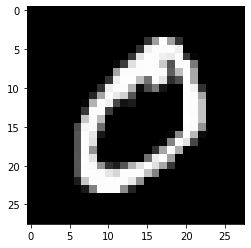

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

image_num = 1
print("The number of image #{0} is {1}".format(
            image_num, y_train[image_num]))

plt.imshow(x_train[image_num], cmap=plt.get_cmap('gray'))

2. แปลงมิติของรูปภาพอินพุทให้เหลือเพียงมิติเดียวโดยมีขนาดเท่ากับ $28*28=784$

In [4]:
x_train_flatten = x_train.reshape(60000, 784)
x_test_flatten  = x_test.reshape(10000, 784)

3. แปลงเอาท์พุท ให้อยู่ในรูป one-hot vector

In [5]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()
label_binarizer.fit(range(10))

y_train_onehot = label_binarizer.transform(y_train)
y_test_onehot  = label_binarizer.transform(y_test)

print(y_train[0])
print(y_train_onehot[0])

5
[0 0 0 0 0 1 0 0 0 0]


4. สร้าง Deep Neural Network โดยใช้ไลบารี่ `keras`

In [6]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=784))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
             optimizer='adam', metrics=['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


5. เทรนโมเดลและตรวจสอบค่า Accuracy

In [7]:
model.fit(x_train_flatten, y_train_onehot, 
          validation_data=(x_test_flatten, y_test_onehot), 
          epochs=20, batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 77us/step - loss: 1.6138 - acc: 0.6641 - val_loss: 0.6140 - val_acc: 0.8473
Epoch 2/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.4884 - acc: 0.8721 - val_loss: 0.3954 - val_acc: 0.9032
Epoch 3/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.3916 - acc: 0.8947 - val_loss: 0.3651 - val_acc: 0.9072
Epoch 4/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.3428 - acc: 0.9075 - val_loss: 0.3101 - val_acc: 0.9202
Epoch 5/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.3196 - acc: 0.9135 - val_loss: 0.2981 - val_acc: 0.9233
Epoch 6/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.2967 - acc: 0.9196 - val_loss: 0.2961 - val_acc: 0.9231
Epoch 7/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.2724 - acc: 0.9243 - val_loss: 0.2785 - val_acc

In [8]:
score = model.evaluate(x_test_flatten, y_test_onehot)

print("Accuracy: {0:.2f}%".format(score[1]*100))

10000/10000 [==============================] - 0s 27us/step
Accuracy: 94.61%


6. ทดลองใช้โมเดลทำนายค่าตัวเลขในรูปภาพ

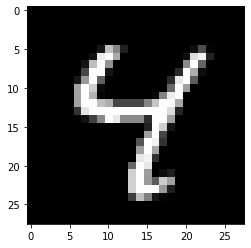

Prediction: 4


In [9]:
imageid = 6
plt.imshow(x_test[imageid], cmap=plt.get_cmap('gray'))
plt.show()

y_pred = model.predict(x_test_flatten)

print("Prediction: {0}".format(np.argmax(y_pred[imageid])))

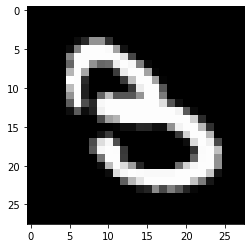

Prediction: 8
True value: 3


In [10]:
incorrect_indices = np.nonzero(
        np.argmax(y_pred, axis=1)!=np.argmax(y_test_onehot, axis=1))[0]

imageid = 0
plt.imshow(x_test[incorrect_indices[imageid]], 
           cmap=plt.get_cmap('gray'))
plt.show()

print("Prediction: {0}".format(np.argmax(y_pred[incorrect_indices[imageid]])))
print("True value: {0}".format(y_test[incorrect_indices[imageid]]))

# การทำนายตัวเลขในรูปภาพโดยใช้ Convolutional Neural Network

Convolutional Neural Network (CNN) คือเครือข่ายประสาทเทียมที่มี convolutional layers เลเยอร์แบบ convolutional คือเลเยอร์ที่ใช้ `convolutional filters` ในการตรวจจับรูปแบบที่ซับซ้อนต่างๆ ภายในข้อมูลรูปภาพหรือข้อมูลที่มีความซับซ้อนสูงอื่น เช่นข้อความภาษาธรรมชาติ เป็นต้น

ตัวอย่างของ convolutional filter สำหรับตรวจจับขอบแนวนอน

![conv-filter](line_filter.jpg)

ตัวอย่างการทำงานของ convolutional filter แสดงได้ดังภาพเคลื่อนไหวต่อไปนี้

In [1]:
from IPython.display import Image 
Image(url='cnn_filter.gif')

X = 
 [[10 10 10  0  0  0]
 [10 10 10  0  0  0]
 [10 10 10  0  0  0]
 [ 0  0  0 10 10 10]
 [ 0  0  0 10 10 10]
 [ 0  0  0 10 10 10]]

Filter = 
 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]

Transformation = 
 [[  0.   0.   0.   0.]
 [ 30.  10. -10. -30.]
 [ 30.  10. -10. -30.]
 [  0.   0.   0.   0.]]


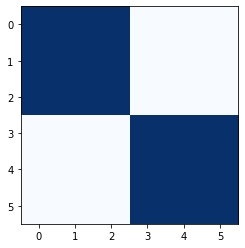

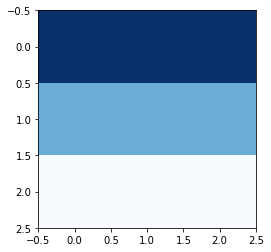

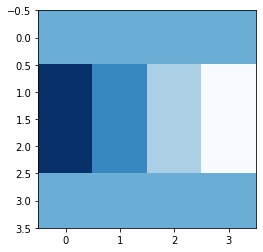

In [11]:
X = np.array([
    [10,10,10,0,0,0],
    [10,10,10,0,0,0],
    [10,10,10,0,0,0],
    [0,0,0,10,10,10],
    [0,0,0,10,10,10],
    [0,0,0,10,10,10],
])

print("X = \n", X)
print()

conv_filter = np.array([
    [1,1,1],
    [0,0,0],
    [-1,-1,-1]
])

print("Filter = \n", conv_filter)

print() 

T = np.zeros((4,4))

for i in range(4):
    for j in range(4):
        T[i,j] = np.sum(X[0+i:3+i, 0+j:3+j] * conv_filter)

print("Transformation = \n", T)

plt.imshow(X, cmap=plt.get_cmap('Blues'))
plt.show()
plt.imshow(conv_filter, cmap=plt.get_cmap('Blues'))
plt.show()
plt.imshow(T, cmap=plt.get_cmap('Blues'))
plt.show()

โมเดล `CNN` ประกอบด้วยเลเยอร์ประเภทต่างๆ ดังนี้

* **Convolutional Layer** คือเลเยอร์ที่ประกอบด้วย convolutional filters มักใช้ในช่วงแรกของเครือข่าย convolutional layers มีความสามารถในการสกัด high-level features จากข้อมูลอินพุท เช่น เส้น, สี, และอ็อบเจ็กต์แบบต่าง ๆ 

* **Pooling Layer** คือเลเยอร์สำหรับลดจำนวนมิติของข้อมูล มักถูกแทรกไว้ระหว่างเลเยอร์ convolutional เป็นระยะๆ เพื่อลดขนาดข้อมูลและจำนวนพารามิเตอร์รวมทั้งลดการเกิด overfitting ไปในตัว Pooling layer ชนิดที่มักใช้บ่อยๆ คือ Max pooling ขนาด 2x2 ดังรูป

![max pooling](maxpooling.jpg)

* **Dense Layer (Fully Connected Layer)** คือเลเยอร์ของโมเดลนิวรอนเน็ตเวิร์กแบบปกติ มักใส่ไว้ในตอนท้ายของ `CNN` เพื่อเรียนรู้ `non-linear patterns` ของ high-level features ที่เรียนรู้โดยชั้น convolutional layers

ตัวอย่างโครงสร้างของ `CNN` แสดงดังรูปต่อไป

![CNN](cnn_mnist.jpeg)

ลำดับถัดไป เราจะทดลองใช้ `CNN` ในการจำแนกรูปภาพในชุดข้อมูล MNIST

1. โหลดข้อมูลและเตรียมข้อมูลสำหรับ `CNN`

In [12]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train_ks = x_train.reshape(-1, 28, 28, 1) # 2D => 3D
x_test_ks = x_test.reshape(-1, 28, 28, 1)   # 2D => 3D

from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
label_binarizer.fit(range(10))

y_train_onehot = label_binarizer.transform(y_train)
y_test_onehot = label_binarizer.transform(y_test)

2. สร้างโมเดล `CNN` ด้วยไลบารี่ `keras`

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()

model.add(Conv2D(32, kernel_size=5,  
                 activation='relu',
                 input_shape=(28, 28, 1)))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=5, 
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

3. เทรนโมเดล และตรวจสอบค่า Accuracy

In [14]:
model.fit(x_train_ks, y_train_onehot, 
          validation_data=(x_test_ks, y_test_onehot),
          epochs=10, batch_size=1024)
score = model.evaluate(x_test_ks, y_test_onehot)
print("Accuracy: {0:.2f}%".format(score[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 32s 539us/step - loss: 4.8851 - acc: 0.6795 - val_loss: 0.3440 - val_acc: 0.9034
Epoch 2/10
60000/60000 [==============================] - 32s 529us/step - loss: 0.2714 - acc: 0.9253 - val_loss: 0.1896 - val_acc: 0.9435
Epoch 3/10
60000/60000 [==============================] - 30s 501us/step - loss: 0.1696 - acc: 0.9520 - val_loss: 0.1405 - val_acc: 0.9580
Epoch 4/10
60000/60000 [==============================] - 30s 505us/step - loss: 0.1250 - acc: 0.9641 - val_loss: 0.1107 - val_acc: 0.9676
Epoch 5/10
60000/60000 [==============================] - 31s 523us/step - loss: 0.0954 - acc: 0.9718 - val_loss: 0.0976 - val_acc: 0.9721
Epoch 6/10
60000/60000 [==============================] - 34s 568us/step - loss: 0.0770 - acc: 0.9771 - val_loss: 0.0871 - val_acc: 0.9755
Epoch 7/10
60000/60000 [==============================] - 32s 541us/step - loss: 0.0633 - acc: 0.9811 - val_loss: 0.

โมเดล Convolutional Neural Network ที่ได้มีประสิทธิภาพดีกว่าโมเดล Deep Neural Network 3.5% (94.61% => 97.93%)

4. ทดลองใช้โมเดลทำนายค่าตัวเลขในรูปภาพ

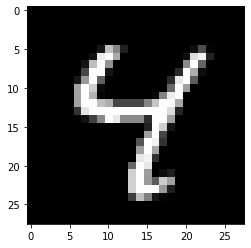

Prediction: 4


In [16]:
imageid = 6
plt.imshow(x_test[imageid], cmap=plt.get_cmap('gray'))
plt.show()

y_pred = model.predict(x_test_ks)

print("Prediction: {0}".format(np.argmax(y_pred[imageid])))

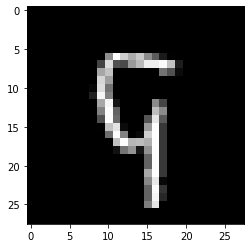

Prediction: 5
True value: 9


In [17]:
incorrect_indices = np.nonzero(
        np.argmax(y_pred, axis=1)!=np.argmax(y_test_onehot, axis=1))[0]

imageid = 0
plt.imshow(x_test[incorrect_indices[imageid]], 
           cmap=plt.get_cmap('gray'))
plt.show()

print("Prediction: {0}".format(np.argmax(y_pred[incorrect_indices[imageid]])))
print("True value: {0}".format(y_test[incorrect_indices[imageid]]))